<a href="https://colab.research.google.com/github/younesA99/svm/blob/main/ANN_PT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Charger les données depuis le fichier Excel
data = pd.read_excel('Concrete_Data.xls')

#renaming all featurses
data.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

# Diviser les données en variables d'entrée (X) et variable cible (y)
X = data[['cement', 'blastFurnace', 'flyAsh', 'water', 'superplasticizer', 'courseAggregate', 'fineaggregate', 'age']]
y = data['strength']

# Normaliser les variables d'entrée
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instancier le modèle MLPRegressor avec les hyperparamètres spécifiés
model = MLPRegressor(solver='lbfgs', max_iter=700, learning_rate='invscaling',
                     hidden_layer_sizes=(35,), alpha=0.52, activation='logistic', random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_test = model.predict(X_test)

# Faire des prédictions sur l'ensemble d'entraînement
y_pred_train = model.predict(X_train)

# Calculer les métriques de performance sur l'ensemble de test
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)

# Calculer les métriques de performance sur l'ensemble d'entraînement
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)

# Afficher les performances sur l'ensemble de test
print("Performance sur l'ensemble de test:")
print("Mean Absolute Error (MAE):", mae_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R-squared (R²):", r2_test)

# Afficher les performances sur l'ensemble d'entraînement
print("\nPerformance sur l'ensemble d'entraînement:")
print("Mean Absolute Error (MAE):", mae_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("R-squared (R²):", r2_train)


Performance sur l'ensemble de test:
Mean Absolute Error (MAE): 3.6480874101800844
Root Mean Squared Error (RMSE): 5.130369425590394
R-squared (R²): 0.8978555599957303

Performance sur l'ensemble d'entraînement:
Mean Absolute Error (MAE): 1.7644601762294778
Root Mean Squared Error (RMSE): 2.455073968823196
R-squared (R²): 0.9787829828583314


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Meilleurs hyperparamètres trouvés :
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
Mean Squared Error on test set with best model: 55.01349985787437


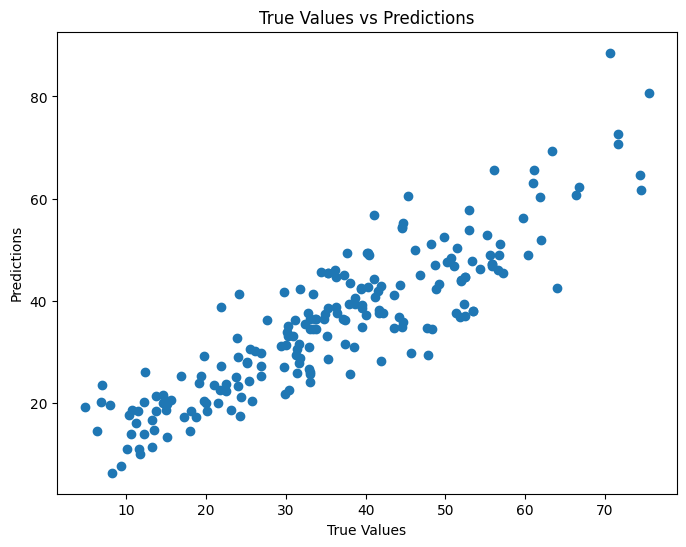

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Charger les données depuis le fichier Excel
data = pd.read_excel('Concrete_Data.xls')

#renaming all featurses
data.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

# Diviser les données en variables d'entrée (X) et variable cible (y)
X = data[['cement', 'blastFurnace', 'flyAsh', 'water', 'superplasticizer', 'courseAggregate', 'fineaggregate', 'age']]
y = data['strength']

# Normaliser les variables d'entrée
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Créer un dictionnaire des hyperparamètres à rechercher
param_grid = {
    'hidden_layer_sizes': [(5,),(6,),(7,),(8,),(9,),(10,),(11,),(12,),(13,),(14,),(15,),],
    'activation': ['relu', 'tanh', 'identity', 'logistic'],
    'solver': ['adam','lbfgs', 'sgd'],
    'alpha': [0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [500, 1000],
}

# Créer le modèle MLPRegressor
mlp = MLPRegressor(random_state=42)

# Recherche par grille des meilleurs hyperparamètres
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# Évaluer le modèle avec les meilleurs hyperparamètres
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set with best model: {mse}")

# Visualisation des prédictions par rapport aux valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

In [ ]:
X_scaled

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

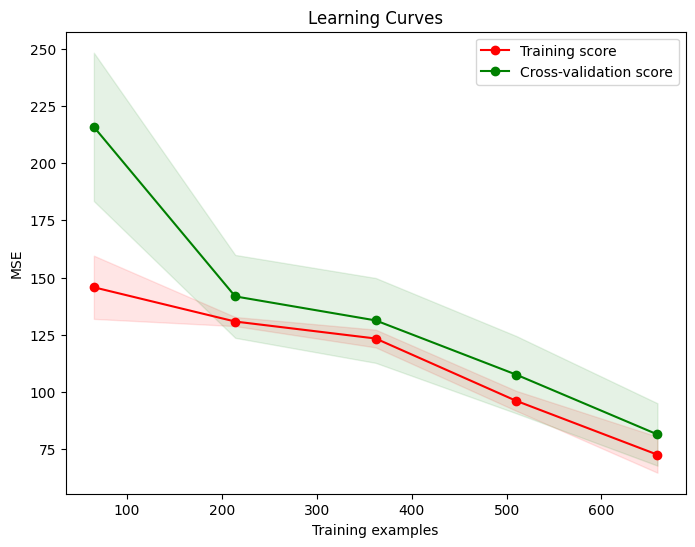

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Calcul des learning curves
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcul des moyennes et écarts-types des scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer les courbes d'apprentissage
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.title("Learning Curves")
plt.show()


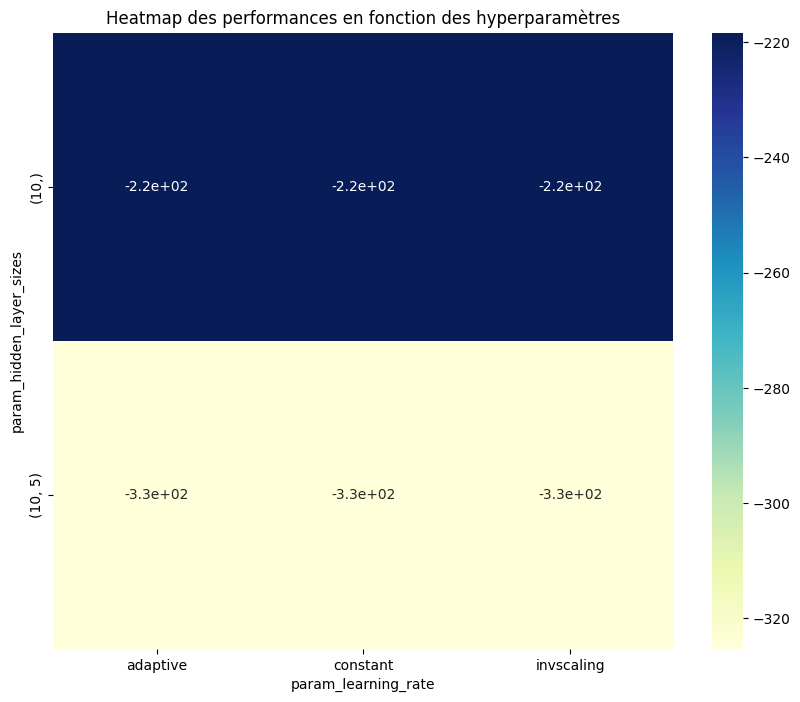

In [ ]:
# Récupérer les résultats de la recherche par grille dans un DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Créer une heatmap pour évaluer les combinaisons d'hyperparamètres
heatmap_data = results_df.pivot_table(values='mean_test_score', index='param_hidden_layer_sizes', columns='param_learning_rate')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Heatmap des performances en fonction des hyperparamètres')
plt.show()


ValueError: ignored

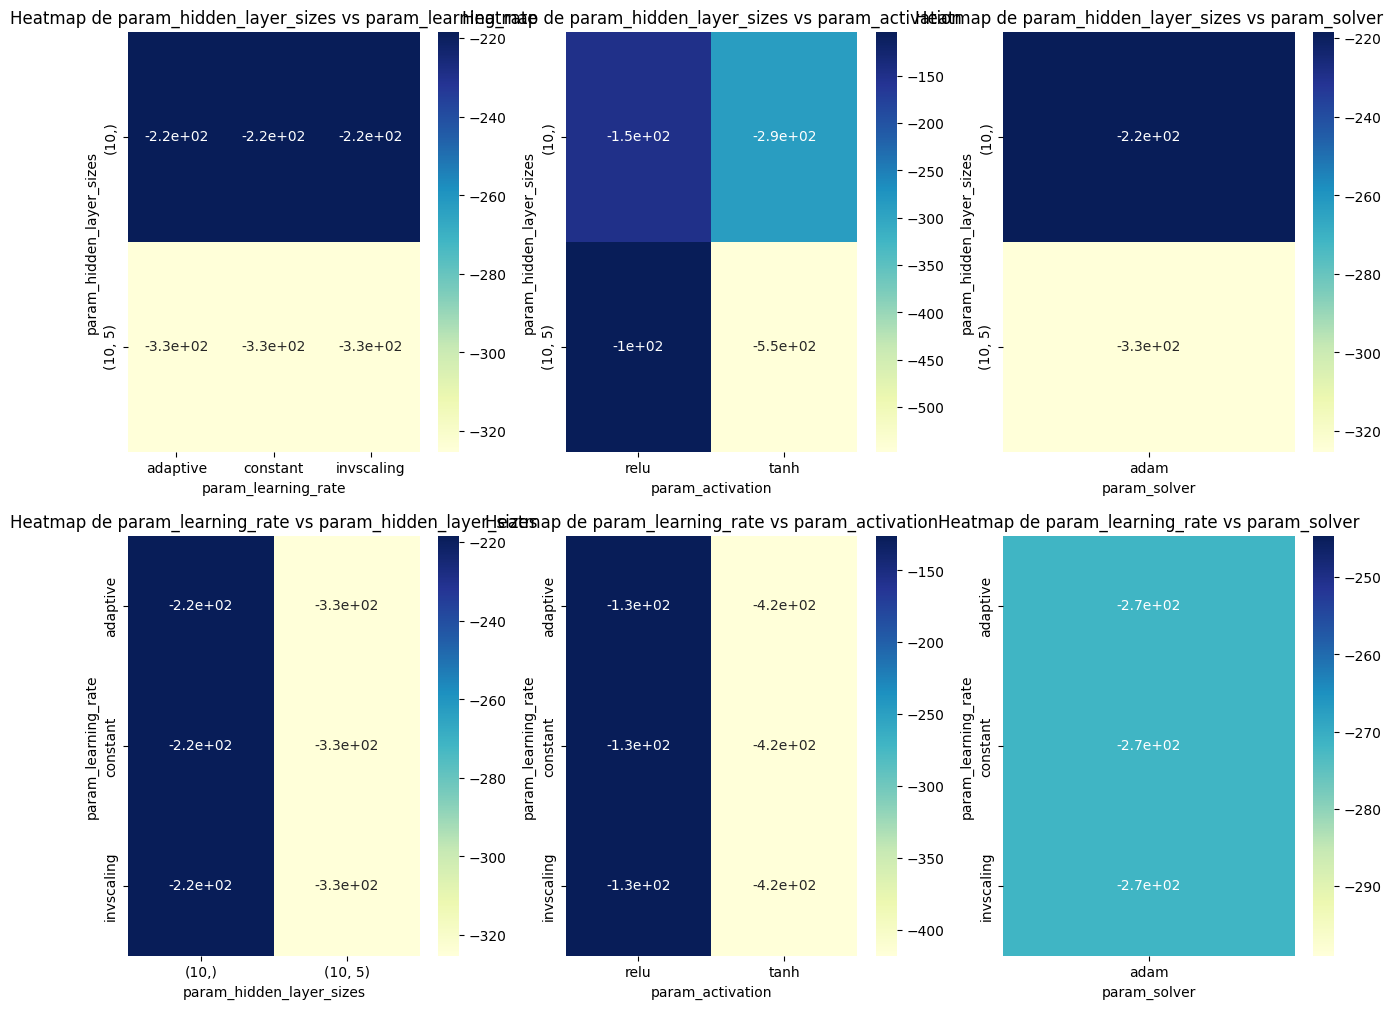

In [ ]:
import math

# Nombre d'hyperparamètres à comparer
num_hyperparameters = len(hyperparameters)

# Calcul du nombre de lignes et de colonnes pour la grille de sous-graphiques
num_cols = 3  # Changer le nombre de colonnes ici selon vos besoins
num_rows = math.ceil(num_hyperparameters / num_cols)

# Créer des heatmaps pour chaque paire d'hyperparamètres
plt.figure(figsize=(16, 12))
for idx, (param1, param2) in enumerate(hyperparam_pairs, 1):
    plt.subplot(num_rows, num_cols, idx)
    heatmap_data = results_df.pivot_table(values='mean_test_score', index=param1, columns=param2)
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
    plt.title(f'Heatmap de {param1} vs {param2}')

plt.tight_layout()
plt.show()



ValueError: ignored

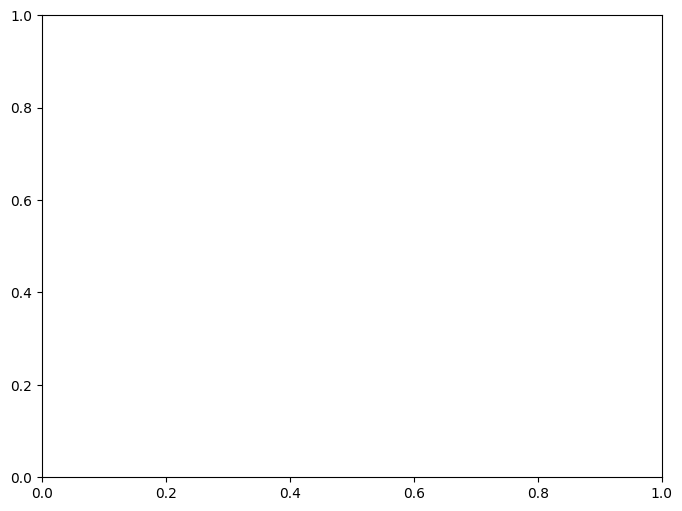

In [ ]:
# Choix d'un hyperparamètre à analyser, par exemple 'param_hidden_layer_sizes'
param_to_analyze = 'param_hidden_layer_sizes'

# Récupérer les valeurs de l'hyperparamètre 'hidden_layer_sizes' et leurs scores correspondants
param_values = results_df['param_hidden_layer_sizes']
param_values = param_values.apply(lambda x: x[0] if isinstance(x, tuple) else x)
param_scores = -results_df['mean_test_score']

# Récupérer les valeurs de l'hyperparamètre et leurs scores correspondants
param_values = results_df[param_to_analyze]
param_scores = -results_df['mean_test_score']

# Tracer le graphique de sensibilité
plt.figure(figsize=(8, 6))
plt.scatter(param_values, param_scores)
plt.xlabel(param_to_analyze)
plt.ylabel('MSE')
plt.title(f'Graphique de sensibilité de {param_to_analyze} sur MSE')
plt.show()


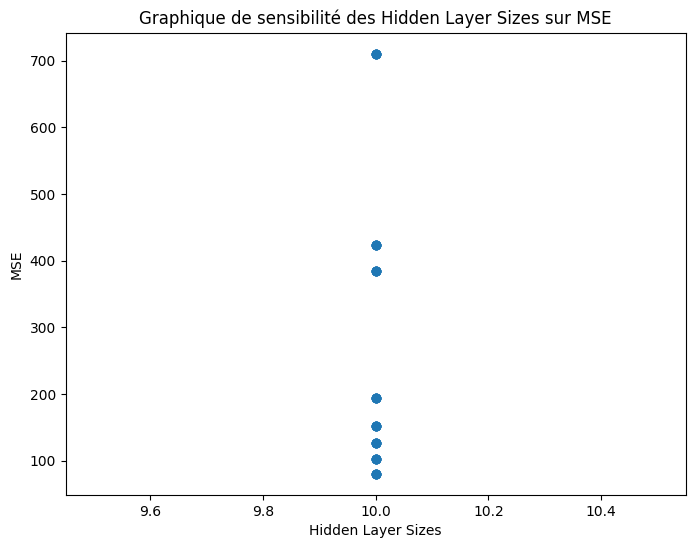

In [ ]:
# Récupérer les valeurs de l'hyperparamètre 'hidden_layer_sizes' et leurs scores correspondants
param_values = results_df['param_hidden_layer_sizes']
param_values = param_values.apply(lambda x: x[0] if isinstance(x, tuple) else x)
param_scores = -results_df['mean_test_score']

# Tracer le graphique de sensibilité
plt.figure(figsize=(8, 6))
plt.scatter(param_values, param_scores)
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('MSE')
plt.title('Graphique de sensibilité des Hidden Layer Sizes sur MSE')
plt.show()


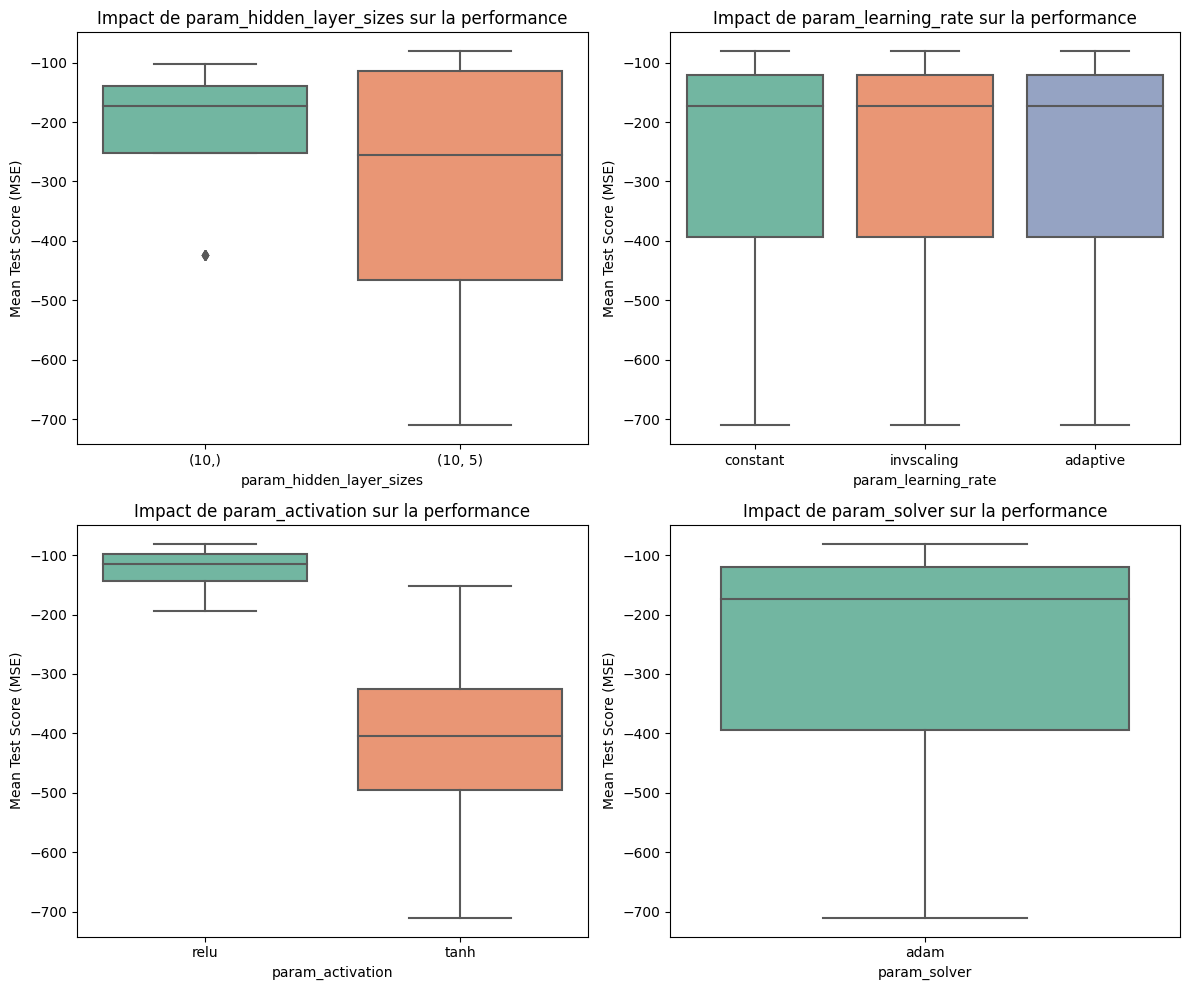

In [ ]:
# Liste des hyperparamètres à évaluer
hyperparameters = ['param_hidden_layer_sizes', 'param_learning_rate', 'param_activation', 'param_solver']

# Créer des sous-graphiques pour chaque hyperparamètre
plt.figure(figsize=(12, 10))
for i, param in enumerate(hyperparameters, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=param, y='mean_test_score', data=results_df, palette='Set2')
    plt.title(f'Impact de {param} sur la performance')
    plt.xlabel(param)
    plt.ylabel('Mean Test Score (MSE)')

plt.tight_layout()
plt.show()



In [ ]:
# Liste des hyperparamètres à évaluer
hyperparameters = ['param_hidden_layer_sizes', 'param_learning_rate', 'param_activation', 'param_solver']

# Création d'un dictionnaire pour stocker les statistiques
summary_table = {}

# Boucle sur chaque hyperparamètre
for param in hyperparameters:
    # Extraction des statistiques pour chaque valeur de l'hyperparamètre
    stats_per_param = results_df.groupby(param)['mean_test_score'].agg(['mean', 'std', 'min', '25%', '50%', '75%', 'max'])
    summary_table[param] = stats_per_param

# Affichage des statistiques sous forme de tableau
for param, stats in summary_table.items():
    print(f"Hyperparamètre : {param}\n")
    print(stats)
    print("\n")


AttributeError: ignored